In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
bikeB = pd.read_csv("bike_buyers.csv")

In [3]:
bikeB

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,NaN,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [4]:
bikeB.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [5]:
#No se encontraron datos duplicados
bikeB.duplicated().value_counts()

False    1000
dtype: int64

<AxesSubplot:xlabel='Marital Status', ylabel='Income'>

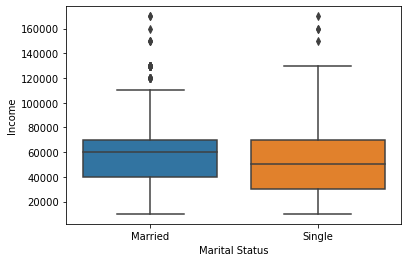

In [6]:
sb.boxplot(x="Marital Status",y="Income",data=bikeB)

In [7]:
#Limpieza de la columna gender
bikeB2 =bikeB.copy()

#L = list()
#L=bikeB2[bikeB2["Gender"].isnull()]["ID"].values

bikeB2.loc[bikeB2['Gender'].isna(),"Gender"]= [i for i in np.random.choice(bikeB2[bikeB2["Gender"].isnull()==False]["Gender"].unique(), bikeB2['Gender'].isna().sum())]

#para revisar los datos reemplazados
#for ID in L:
  # print (bikeB2[bikeB2["ID"]==ID]["Gender"])

#bikeB.iloc[99]["Gender"]

In [8]:
#Limpieza de la Columna Edad
bikeB2["Age"]=bikeB2["Age"].fillna(value=bikeB2["Age"].median())

#bikeB2.info()

In [9]:
#Limpieza de la columna Income
bikeB2["Income"]=bikeB2["Income"].fillna(value=bikeB2["Income"].median())
#ya que hay datos atipicos


In [10]:
#Limpieza de la columna Children

bikeB2.loc[bikeB2["Children"].isna(),"Children"]= [i for i in np.random.choice([0,1,2,3,4,5], bikeB2["Children"].isna().sum())]


In [11]:
#Limpieza de la columna Marital Status
bikeB2.loc[bikeB2["Marital Status"].isna(),"Marital Status"]= [i for i in np.random.choice(bikeB2[bikeB2["Marital Status"].isnull()==False]["Marital Status"].unique(), bikeB2['Marital Status'].isna().sum())]


In [12]:
#Limpieza de la columna Car
bikeB2.loc[bikeB2["Cars"].isna(),"Cars"]= [i for i in np.random.choice([0,1,2,3,4], bikeB2["Cars"].isna().sum())]

In [13]:
#Limpieza de la columna HomeOwner
bikeB2.loc[bikeB2["Home Owner"].isna(),"Home Owner"]=[i for i in np.random.choice(bikeB2[bikeB2["Home Owner"].isnull()==False]["Home Owner"].unique(), bikeB2["Home Owner"].isna().sum())]


In [14]:
# Segmentar Commute Distance

#['0-1 Miles', '2-5 Miles', '5-10 Miles', '1-2 Miles', '10+ Miles']

bikeB2["New Commute Distance"] = bikeB2["Commute Distance"].replace({"0-1 Miles":"Minimal","1-2 Miles":"Short","2-5 Miles":"Moderate","5-10 Miles":"Long","10+ Miles":"Extensive"})


In [15]:
#¿Cuánto es el promedio de ingresos de acuerdo con si la bicicleta fue comprada o no por el cliente?

MeanIncomePB=bikeB2[["Income","Purchased Bike"]].groupby("Purchased Bike")
MeanIncomePB.mean()

,Income
Purchased Bike,
No,54874.759152
Yes,57817.047817


In [16]:
#¿Cuánto es el promedio de ingresos según el estado civil del cliente?
MeanIncomeMS=bikeB2[["Income","Marital Status"]].groupby("Marital Status")
MeanIncomeMS.mean()

,Income
Marital Status,
Married,58627.087199
Single,53557.483731


In [17]:
#Creamos una nueva columna que indique con el valor 1 si es que tiene hijos, y el valor 0 si es que no tiene hijos
bikeB2["Con_Hijos"]=np.where(bikeB2["Children"]>0,1,0)


In [18]:
Mean_N_hijosXEdu = bikeB2[["Children","Education"]].groupby("Education")
Mean_N_hijosXEdu.mean()

,Children
Education,
Bachelors,1.960784
Graduate Degree,2.005747
High School,1.949721
Partial College,1.856604
Partial High School,1.578947


<AxesSubplot:xlabel='Education', ylabel='Children'>

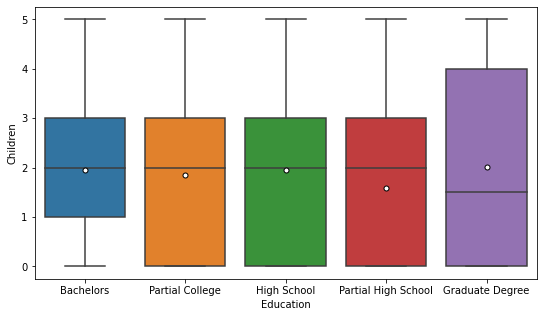

In [19]:
plt.figure(figsize=(9,5))
sb.boxplot(x="Education",y="Children",data=bikeB2,showmeans=True,meanprops={'marker':'o','markerfacecolor':'white','markeredgecolor':'black','markersize':'5'})

In [20]:
#Creamos una nueva columna que indique con el valor 1 si es que el cliente tiene vehiculo, y 0 si no tiene
bikeB2["Con_vehiculo"]=np.where(bikeB2["Cars"]>0,1,0)

In [21]:
Mean_VehixCli = bikeB2[["Occupation","Cars"]].groupby("Occupation")
Mean_VehixCli.mean()

,Cars
Occupation,
Clerical,0.841808
Management,2.156069
Manual,1.067227
Professional,1.713768
Skilled Manual,1.317647


<AxesSubplot:xlabel='Occupation', ylabel='Cars'>

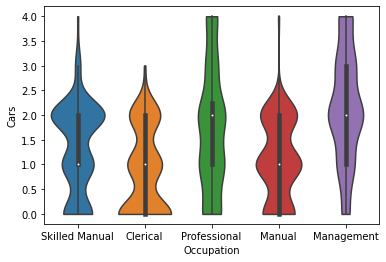

In [22]:

sb.violinplot(x="Occupation",y="Cars",data=bikeB2,cut=0)

In [23]:
#Promedio de edad de acuerdo si el cliente es o no es dueño de una casa
HomeOwnerxAge = bikeB2[["Home Owner","Age"]].groupby("Home Owner")
HomeOwnerxAge.mean()


,Age
Home Owner,
No,42.294304
Yes,45.039474


<AxesSubplot:xlabel='Home Owner', ylabel='Age'>

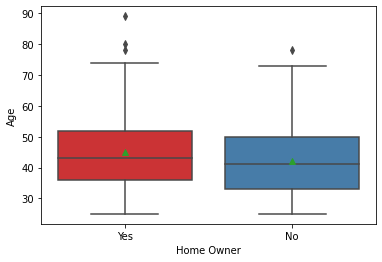

In [24]:

sb.boxplot(data=bikeB2,x="Home Owner",y="Age",palette="Set1",showmeans=True)


<AxesSubplot:>

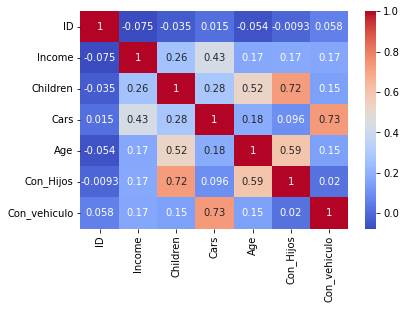

In [25]:

#plt.figure(figsize=(25,5))
#sb.countplot(x="Income",data=bikeB2)
sb.heatmap(bikeB2.corr(),annot=True,cmap='coolwarm')


#sb.pairplot(bikeB2,kind='reg')

In [26]:

#bikeB3[bikeB3['Income']<=50000]['Income']="Bajo"
#bikeB3[]['Income']="Medio"
#bikeB3[]['Income']="Alto"



MODELADO

In [27]:
bikeB3 =bikeB2[(bikeB2['Income']<=110000) &(bikeB2['Age']<=75)].copy()
#bikeB3['Income_Log'] = round(np.log(bikeB3['Income']+1),2)
bikeB3['Purchased Bike'] = bikeB3['Purchased Bike'].replace({"Yes":1,"No":0})


In [28]:
Bike_index = bikeB3[['ID','Purchased Bike']]
bikeB3 = bikeB3.drop(['ID'], axis = 1)
bikeB3 = bikeB3.drop(['Con_Hijos'], axis = 1)
bikeB3 = bikeB3.drop(['Con_vehiculo'], axis = 1)
bikeB3 = bikeB3.drop(['Education'], axis = 1)
##bikeB3 = bikeB3.drop(['Income'], axis = 1)


In [29]:
V_numericas= bikeB3.select_dtypes(include=['float64', 'int'])

In [30]:
bikeB3 = bikeB3.drop(['Commute Distance'], axis = 1)
V_categoricas = bikeB3.select_dtypes(include=['object','category'])

In [31]:
#V_categoricas.describe()
#V_numericas.describe()
bikeB3.head()

,Marital Status,Gender,Income,Children,Occupation,Home Owner,Cars,Region,Age,Purchased Bike,New Commute Distance
0,Married,Female,40000.0,1.0,Skilled Manual,Yes,0.0,Europe,42.0,0,Minimal
1,Married,Male,30000.0,3.0,Clerical,Yes,1.0,Europe,43.0,0,Minimal
2,Married,Male,80000.0,5.0,Professional,No,2.0,Europe,60.0,0,Moderate
3,Single,Male,70000.0,0.0,Professional,Yes,1.0,Pacific,41.0,1,Long
4,Single,Male,30000.0,0.0,Clerical,No,0.0,Europe,36.0,1,Minimal


<AxesSubplot:>

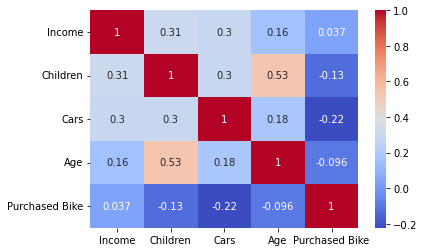

In [32]:
sb.heatmap(bikeB3.corr(),annot=True,cmap='coolwarm')

In [33]:
X = bikeB3.drop(["Purchased Bike"],axis=1)
Y =bikeB3["Purchased Bike"]



In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  roc_curve, auc, silhouette_score, recall_score, precision_score, confusion_matrix, accuracy_score
from sklearn import metrics

In [35]:
categoricas = X.select_dtypes(include=('object','category')).columns.tolist()
numericas = X.select_dtypes(include=('int64','float64')).columns.tolist()
numericas

['Income', 'Children', 'Cars', 'Age']

In [36]:
'Con_Hijos','Con_vehiculo'
categorical=pd.get_dummies(X[categoricas],columns=categoricas,drop_first=True)
categorical.columns = ['Marital Status','Gender','Occupation_1','Occupation_2','Occupation_3',
'Occupation_4','Home Owner','Region_1','Region_2',"Commute Distance_1","Commute Distance_2","Commute Distance_3","Commute Distance_4"]

#categorical.columns = ['Marital Status','Gender','Education_1','Education_2','Education_3','Education_4','Occupation_1','Occupation_2','Occupation_3',
#'Occupation_4','Home Owner','Region_1','Region_2',"Commute Distance_1","Commute Distance_2","Commute Distance_3","Commute Distance_4","Con_Hijos","Con_vehiculo"]

In [37]:

numerical = X[numericas]
numerical
preprocessed_data = pd.merge(numerical, categorical, left_index=True, right_index=True)
preprocessed_data.head()

,Income,Children,Cars,Age,Marital Status,Gender,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Home Owner,Region_1,Region_2,Commute Distance_1,Commute Distance_2,Commute Distance_3,Commute Distance_4
0,40000.0,1.0,0.0,42.0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,30000.0,3.0,1.0,43.0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,80000.0,5.0,2.0,60.0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,70000.0,0.0,1.0,41.0,1,1,0,0,1,0,1,0,1,1,0,0,0
4,30000.0,0.0,0.0,36.0,1,1,0,0,0,0,0,0,0,0,1,0,0


In [38]:
variables_str  = X.select_dtypes(include = ['object','category']).columns.tolist()
for var in variables_str:
    print('N de ', var,':',bikeB3[var].nunique())

N de  Marital Status : 2
N de  Gender : 2
N de  Occupation : 5
N de  Home Owner : 2
N de  Region : 3
N de  New Commute Distance : 5


Entrenamiento

In [39]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data,Y,train_size = 0.8,random_state = 20,stratify = Y)

In [40]:
model_rf = RandomForestClassifier(random_state = 49, max_features = "auto")


In [41]:
skf = StratifiedKFold(n_splits= 5,shuffle=True, random_state = 49)
cross_val = cross_val_score(cv = skf, estimator = model_rf, X=X_train, y=y_train,scoring = 'accuracy') # 'auc_roc'

print("Todos los scores:",cross_val)
print("Promedio de los scores:",np.mean(cross_val))

Todos los scores: [0.74       0.63333333 0.73333333 0.67333333 0.75167785]
Promedio de los scores: 0.7063355704697987


In [42]:
# Entrenamiento
model_rf_all = model_rf.fit(X_train, y_train)

In [43]:
features_rf = pd.DataFrame()
features_rf['variable'] = X_train.columns
features_rf['Importancia'] = model_rf_all.feature_importances_
features_rf.sort_values(by = ['Importancia'],ascending=False,inplace = True)
features_rf

,variable,Importancia
3,Age,0.262985
0,Income,0.135363
1,Children,0.117185
2,Cars,0.099649
5,Gender,0.054511
4,Marital Status,0.048172
10,Home Owner,0.038557
11,Region_1,0.034859
14,Commute Distance_2,0.029962
15,Commute Distance_3,0.027831


<AxesSubplot:xlabel='Importancia', ylabel='variable'>

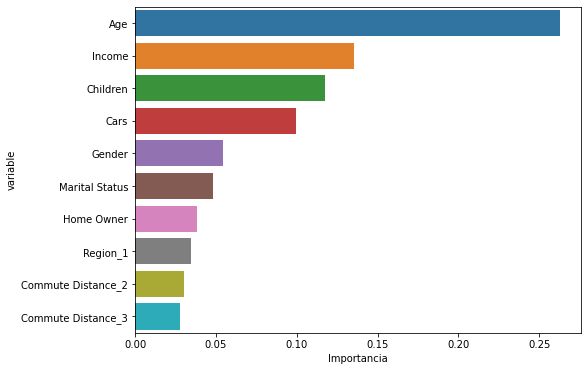

In [44]:
fig,ax = plt.subplots(1,1,figsize = (8,6))
sb.barplot(y='variable',x = 'Importancia',data = features_rf.head(10),
           order =features_rf.head(10)['variable'],
           ax=ax)

In [45]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

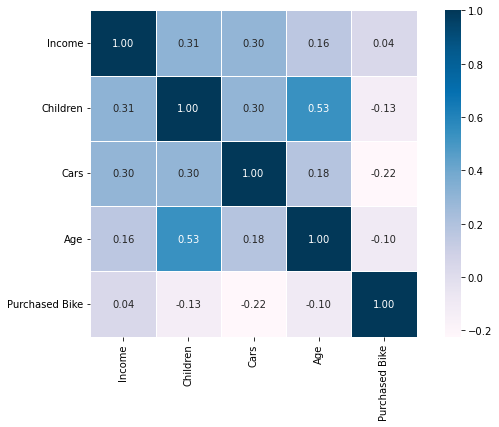

In [46]:
corr_matrix = bikeB3.select_dtypes(include=['float64', 'int']).corr(method='pearson')
corr = sb.heatmap(corr_matrix, 
                   vmax = 1, 
                   square = True, 
                   linewidth = 0.5, 
                   yticklabels = True, 
                   xticklabels = True, 
            cbar_kws = {'shrink' : 1}, 
                   annot = True, 
                   fmt = '.2f', 
                   cmap = 'PuBu')
corr.figure.set_size_inches(10,6)

In [47]:

df_final = bikeB3


In [48]:
XF = df_final.drop(['Purchased Bike'], axis = 1)
YF = df_final['Purchased Bike']

In [49]:
categoricas = XF.select_dtypes(include=('object','category')).columns.tolist()
numericas = XF.select_dtypes(include=('int64','float64')).columns.tolist()
categoricas

['Marital Status',
 'Gender',
 'Occupation',
 'Home Owner',
 'Region',
 'New Commute Distance']

In [50]:
categorical=pd.get_dummies(XF[categoricas],columns=categoricas,drop_first=True)
categorical.columns = ['Marital Status','Gender','Occupation_1','Occupation_2','Occupation_3',
'Occupation_4','Home Owner','Region_1','Region_2',"Commute Distance_1","Commute Distance_2","Commute Distance_3","Commute Distance_4"]

#categorical.columns = ['Marital Status','Gender','Education_1','Education_2','Education_3','Education_4','Occupation_1','Occupation_2','Occupation_3',
#'Occupation_4','Home Owner','Region_1','Region_2',"Commute Distance_1","Commute Distance_2","Commute Distance_3","Commute Distance_4","Con_Hijos","Con_vehiculos"]



In [51]:
#opcional?
scaler = StandardScaler()
numerical = XF[numericas]
numerical
numerical = pd.DataFrame(scaler.fit_transform(numerical),
                         columns=['Income','Children','Car','Age'],index= numerical.index)

In [52]:
preprocessed_data = pd.merge(numerical, categorical, left_index=True, right_index=True)
preprocessed_data.head()

,Income,Children,Car,Age,Marital Status,Gender,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Home Owner,Region_1,Region_2,Commute Distance_1,Commute Distance_2,Commute Distance_3,Commute Distance_4
0,-0.462282,-0.545770,-1.294016,-0.159257,0,0,0,0,0,1,1,0,0,0,1,0,0
1,-0.862614,0.677642,-0.340798,-0.069687,0,1,0,0,0,0,1,0,0,0,1,0,0
2,1.139043,1.901055,0.612420,1.453007,0,1,0,0,1,0,0,0,0,0,0,1,0
3,0.738712,-1.157476,-0.340798,-0.248827,1,1,0,0,1,0,1,0,1,1,0,0,0
4,-0.862614,-1.157476,-1.294016,-0.696678,1,1,0,0,0,0,0,0,0,0,1,0,0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data,YF,train_size = 0.8,random_state = 20,stratify = YF)

In [54]:
rl = LogisticRegression(max_iter = 250, # Número máximo de iteraciones 
                        C = 0.5,        # Inverso de la fuerza de regularización
                        penalty='l2',
                        solver = 'sag') # Penalización admitida L2

In [55]:
skf = StratifiedKFold(n_splits= 5,shuffle=True, random_state = 49)
cross_val = cross_val_score(cv = skf,
                           estimator = rl,# Modelo
                           X=X_train,
                           y=y_train, 
                           scoring = 'accuracy') # 'auc_roc'

print("Todos los scores:",cross_val)
print("Promedio de los scores:",np.mean(cross_val))

Todos los scores: [0.61333333 0.62666667 0.65333333 0.59333333 0.66442953]
Promedio de los scores: 0.6302192393736018


c:\Users\karim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


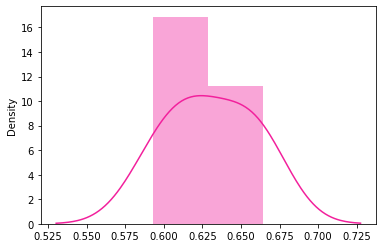

In [56]:
cv_score_rl = cross_val_score(rl, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=1)
sb.distplot(cv_score_rl, color='#f2209c')
#plt.savefig('Xval_logreg.png', bbox_inches='tight')

In [57]:
rl.fit(X_train, y_train) 

LogisticRegression(C=0.5, max_iter=250, solver='sag')

In [58]:
y_pred_train=rl.predict(X_train) # Prediccion sobre el train
y_pred_test=rl.predict(X_test) # Prediccion sobre el test

(array([23., 26., 16., 28., 24., 25., 20., 16.,  8.,  2.]),
 array([0.21504621, 0.28323476, 0.3514233 , 0.41961184, 0.48780038,
        0.55598893, 0.62417747, 0.69236601, 0.76055456, 0.8287431 ,
        0.89693164]),
 <BarContainer object of 10 artists>)

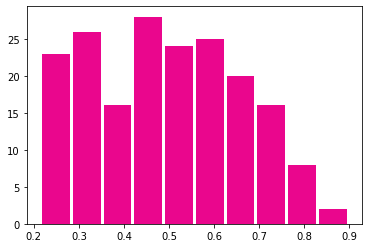

In [59]:
prob_test_rl = rl.predict_proba(X_test)[:,1]
plt.hist(prob_test_rl, color = '#ea068d', rwidth=0.9)
#plt.savefig('Probabilidades_logreg.png', bbox_inches='tight')

(array([ 18.,  57.,  79., 126., 132., 115., 117.,  61.,  33.,  11.]),
 array([0.08912431, 0.17127032, 0.25341634, 0.33556235, 0.41770836,
        0.49985437, 0.58200038, 0.66414639, 0.7462924 , 0.82843841,
        0.91058442]),
 <BarContainer object of 10 artists>)

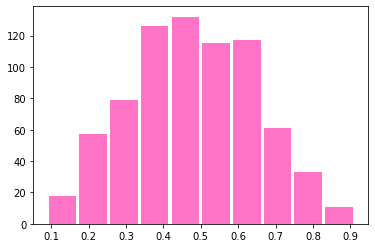

In [60]:
prob_train_rl = rl.predict_proba(X_train)[:,1]
plt.hist(prob_train_rl, color = '#ff74c6', rwidth=0.9)
#plt.savefig('Probabilidades_train_logreg.png', bbox_inches='tight')

In [61]:
#MATRIZ DE CONFU
## Funciones
def print_mc(matriz_conf):
    matriz_conf = pd.DataFrame(matriz_conf)
    matriz_conf.index = ["Real_0","Real_1"]
    matriz_conf.columns = ["Pred_0","Pred_1"]
    print(matriz_conf)
    
def fx_evaluate_classif(y_real, pred, pred_proba):
    from sklearn import metrics as mt
    matriz_conf = mt.confusion_matrix(y_real,pred)
    print_mc(matriz_conf)
    roc = mt.roc_auc_score(y_real,pred_proba)
    accuracy_real = mt.accuracy_score(y_real,pred)
    print("\nROC: ", roc) 
    print("Accu:", accuracy_real,'\n')
    print(mt.classification_report(y_real, pred)[0:163])

In [62]:
print("Metricas del Testing..." + "\n")
fx_evaluate_classif(y_test, y_pred_test, prob_test_rl)

Metricas del Testing...

        Pred_0  Pred_1
Real_0      67      31
Real_1      31      59

ROC:  0.7310657596371883
Accu: 0.6702127659574468 

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        98
           1       0.66      0.66      0.66        90



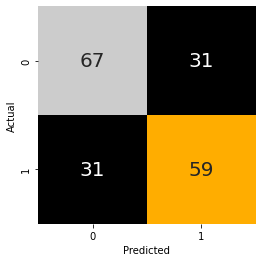

In [63]:
mat_logreg = confusion_matrix(y_test, y_pred_test)
sb.heatmap(mat_logreg, annot=True, fmt='d',cmap='nipy_spectral', square=True, cbar=False, annot_kws = {'size' : 20})
plt.ylabel('Actual')
plt.xlabel('Predicted')
#plt.savefig('Confusion_matrix_logreg.png', bbox_inches='tight')

In [64]:
auc_rl = metrics.roc_auc_score(y_test, prob_test_rl)
auc_rl

0.7310657596371883

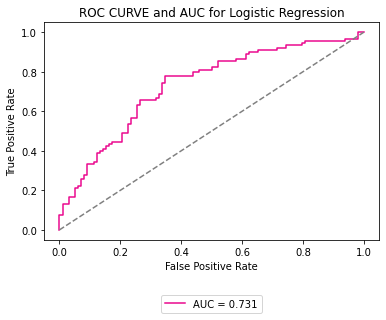

In [65]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_test_rl)
plt.plot(fpr, tpr, label= "AUC = " + str(auc_rl.round(3)), color='#ea068d')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC CURVE and AUC for Logistic Regression')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(.5,-0.23), loc='upper center')
